# **Importing Modules**

In [2]:
!pip install scikeras

In [124]:
import numpy as np
import pandas as pd
import os
import shutil
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

import pickle
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor

In [4]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
shutil.copy('drive/MyDrive/HCMUT/ML/asm/gogo.zip', '.')
with zipfile.ZipFile('gogo.zip', 'r') as zf:
    zf.extractall()
os.chdir('Walmart-Sales-Time-Series-Forecasting-Using-Machine-Learning')

# **Importing Datasets**

In [11]:
data = pd.read_csv('datasets/train.csv')
stores = pd.read_csv('datasets/stores.csv')
features = pd.read_csv('datasets/features.csv')

**Training Dataset**

In [12]:
data.shape

(421570, 5)

In [13]:
data.tail(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
421560,45,98,2012-08-24,415.40,False
421561,45,98,2012-08-31,346.04,False
421562,45,98,2012-09-07,352.44,True
421563,45,98,2012-09-14,605.96,False
421564,45,98,2012-09-21,467.30,False
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


**Dataset containing info of Stores**

In [15]:
stores.shape

(45, 3)

In [16]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [17]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


**Dataset containing additional data of Stores**

In [18]:
features.shape

(8190, 12)

In [19]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [20]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Handling missing values of features dataset**

In [21]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [22]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [23]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# **Merging Training Dataset and merged stores-features Dataset**

In [24]:
data = pd.merge(data,stores,on='Store',how='left')

In [25]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [26]:
data['Date'] = pd.to_datetime(data['Date'])

In [27]:
data.sort_values(by=['Date'],inplace=True)

In [28]:
data.set_index(data.Date, inplace=True)

In [29]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [30]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [31]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


# **Splitting Date Column**

In [32]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

In [33]:
data['Date'][0]

Timestamp('2010-02-05 00:00:00')

In [34]:
data.head(10)

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,2,49,2010-02-05,15767.00,A,202307,40.19,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,2010,2,5
2010-02-05,29,9,2010-02-05,4419.73,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,10,2010-02-05,7550.67,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5
2010-02-05,29,11,2010-02-05,6964.21,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False,2010,2,5


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

# **Outlier Detection and Abnormalities**

**Outliers**

In [36]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [37]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [38]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [39]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [40]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [41]:
data.shape

(421533, 20)

In [42]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(375438, 20)

**Negative Weekly Sales**

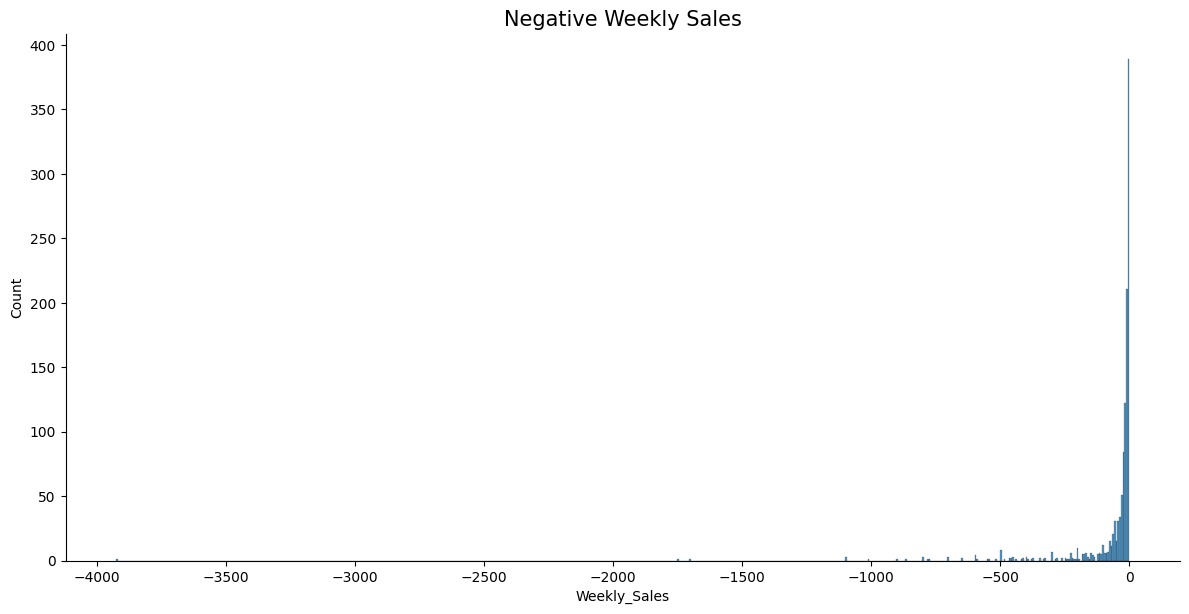

In [43]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.savefig('plots/negative_weekly_sales.png')
plt.show()

In [44]:
data=data[data['Weekly_Sales']>=0]

In [45]:
data.shape

(374247, 20)

In [46]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

<ipython-input-46-8fdcbc3ff8c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsHoliday'] = data['IsHoliday'].astype('int')


In [47]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


In [48]:
data.to_csv('./datasets/preprocessed_walmart_dataset.csv')

# **Data Visuallizations**

**Average Monthly Sales**

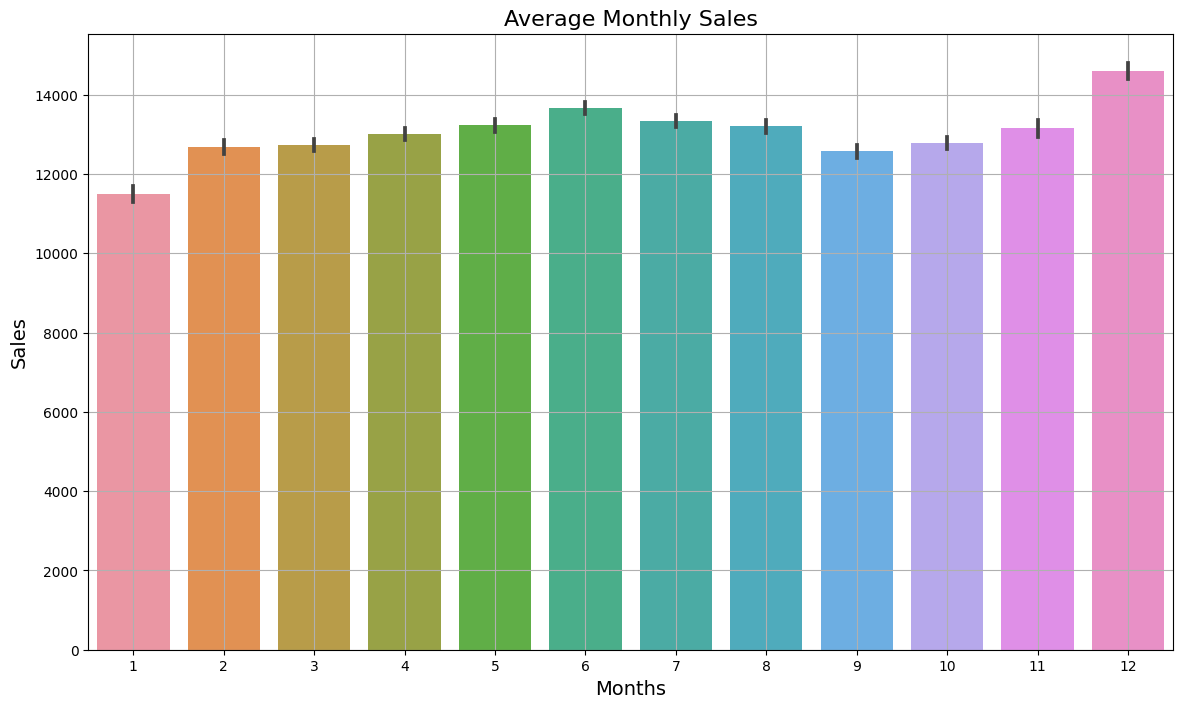

In [49]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.savefig('plots/avg_monthly_sales.png')
plt.grid()

**Monthly Sales for Each Year**

In [50]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


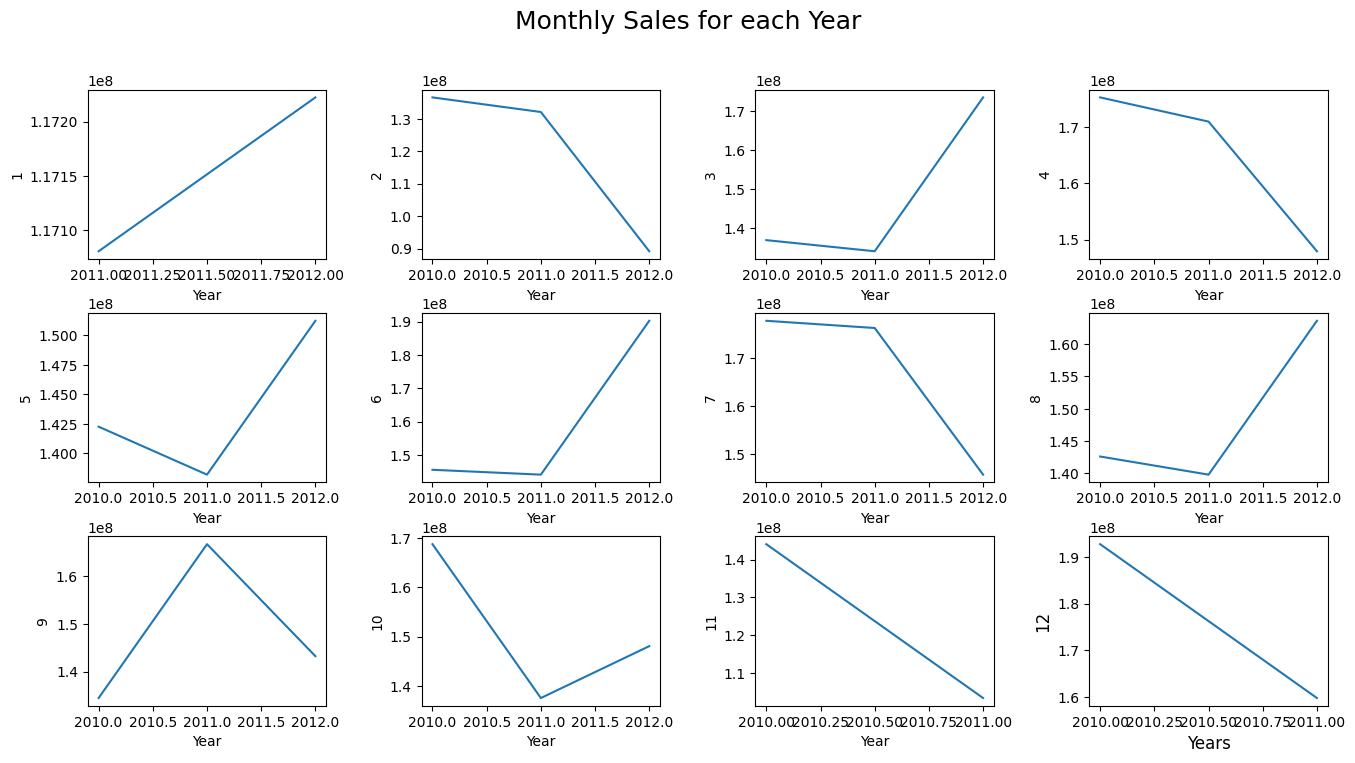

In [51]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.savefig('plots/monthly_sales_every_year.png')
plt.show()

**Average Weekly Sales Store wise**

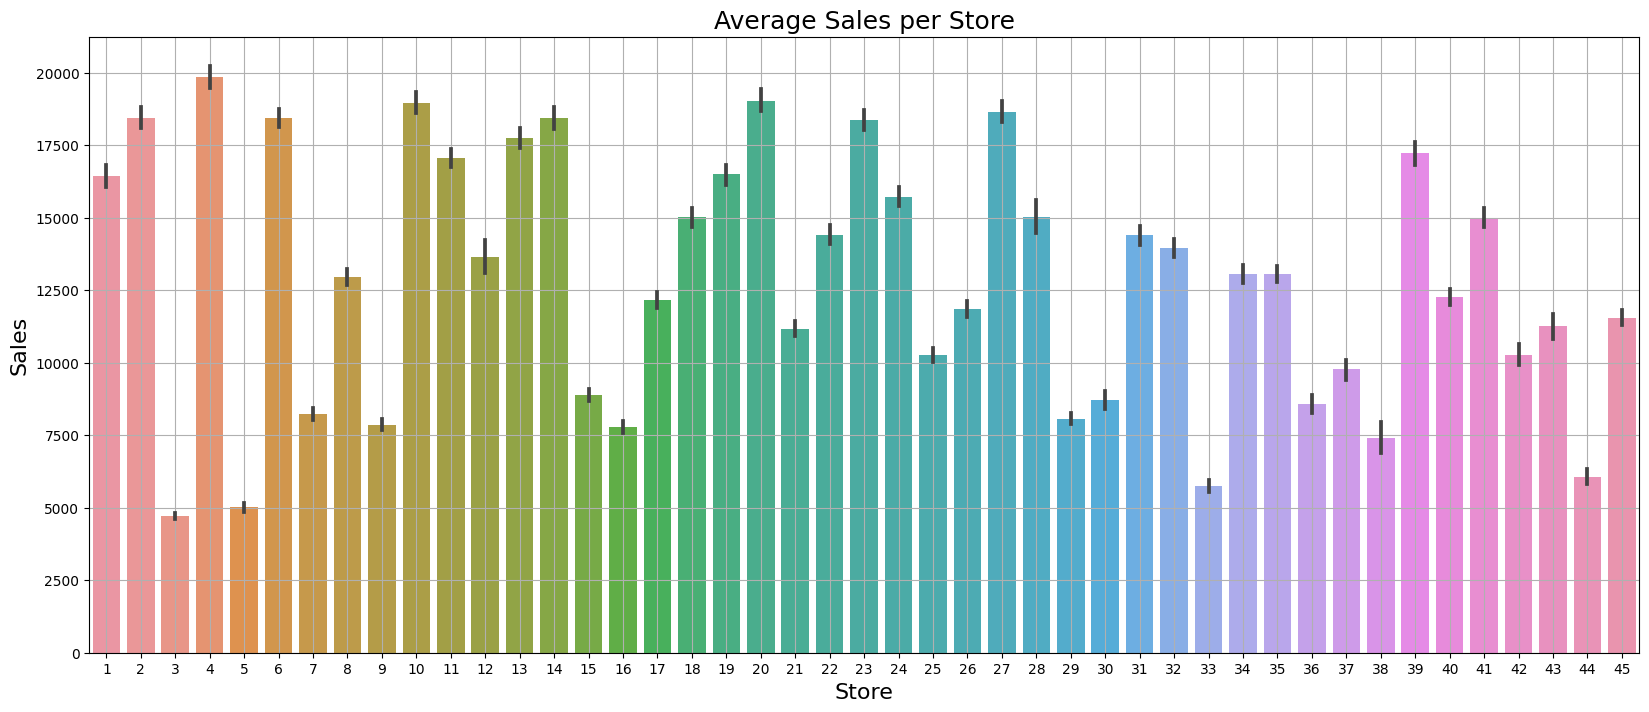

In [52]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('plots/avg_sales_store.png')
plt.show()

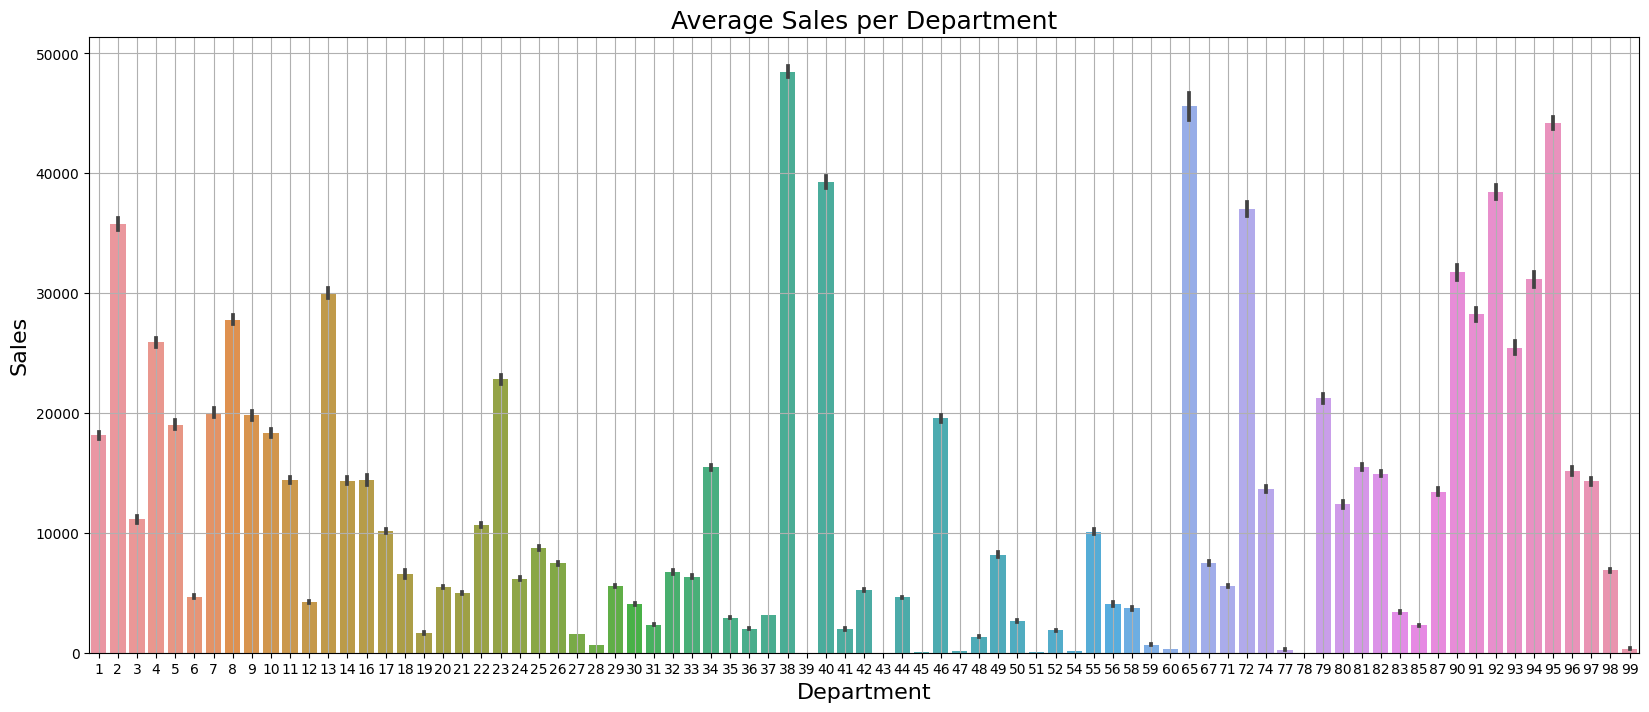

In [53]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.savefig('plots/avg_sales_dept.png')
plt.show()

**Sales Vs Temperature**

<ipython-input-54-632529051a9b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])


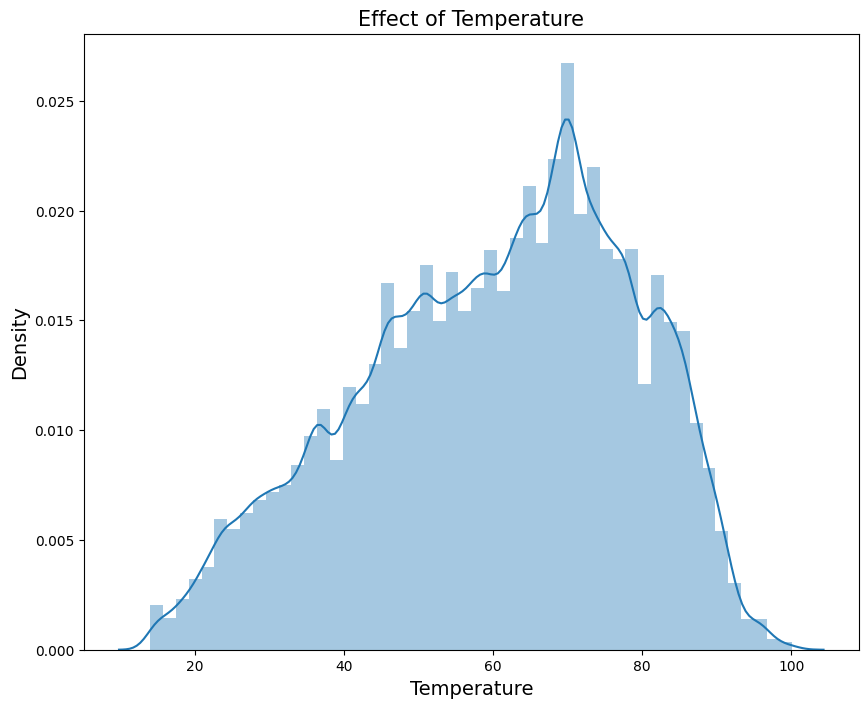

In [54]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.savefig('plots/effect_of_temp.png')
plt.show()

**Holiday Distribution**

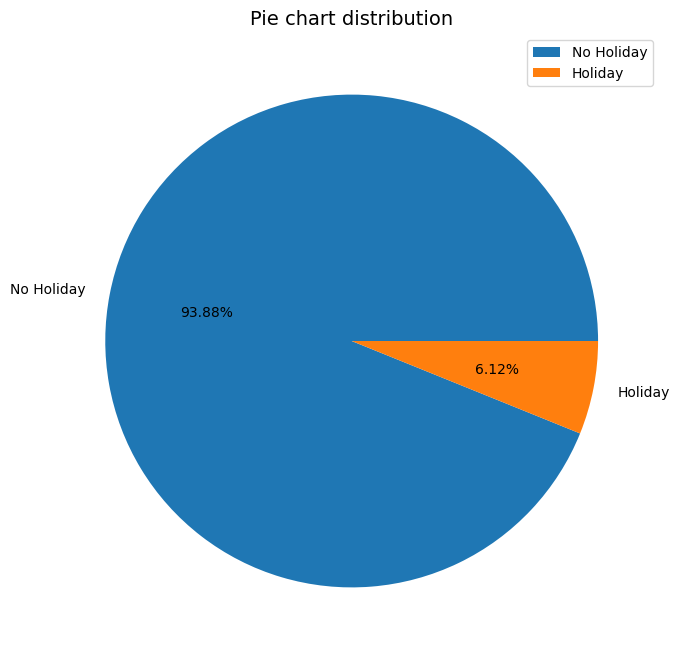

In [55]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.savefig('plots/holiday_distribution.png')
plt.show()

#**Time Series Decompose**

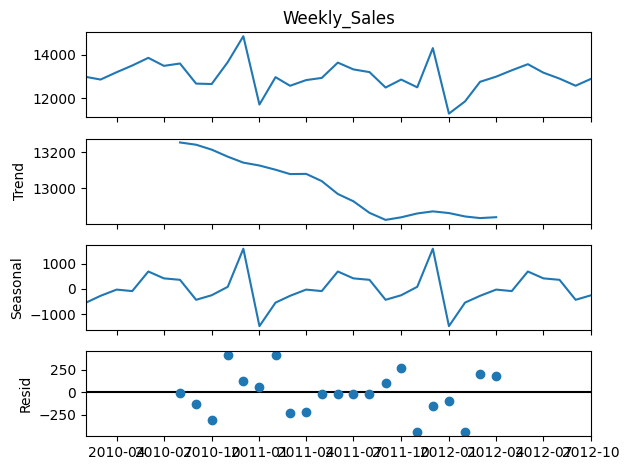

In [56]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.savefig('plots/seasonal_decompose.png')
plt.show()

# **One-hot-encoding**

In [57]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [58]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [59]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [60]:
data_cat.head(10)

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
data.shape

(374247, 20)

In [62]:
data = pd.concat([data, data_cat],axis=1)

In [63]:
data.shape

(374247, 149)

In [64]:
data.drop(columns=cat_col,inplace=True)

In [65]:
data.drop(columns=['Date'],inplace=True)

In [66]:
data.shape

(374247, 145)

# **Data Normalization**

In [67]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [68]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [69]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [70]:
data = normalization(data.copy(),num_col)

In [71]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


# **Correlation between features of dataset**

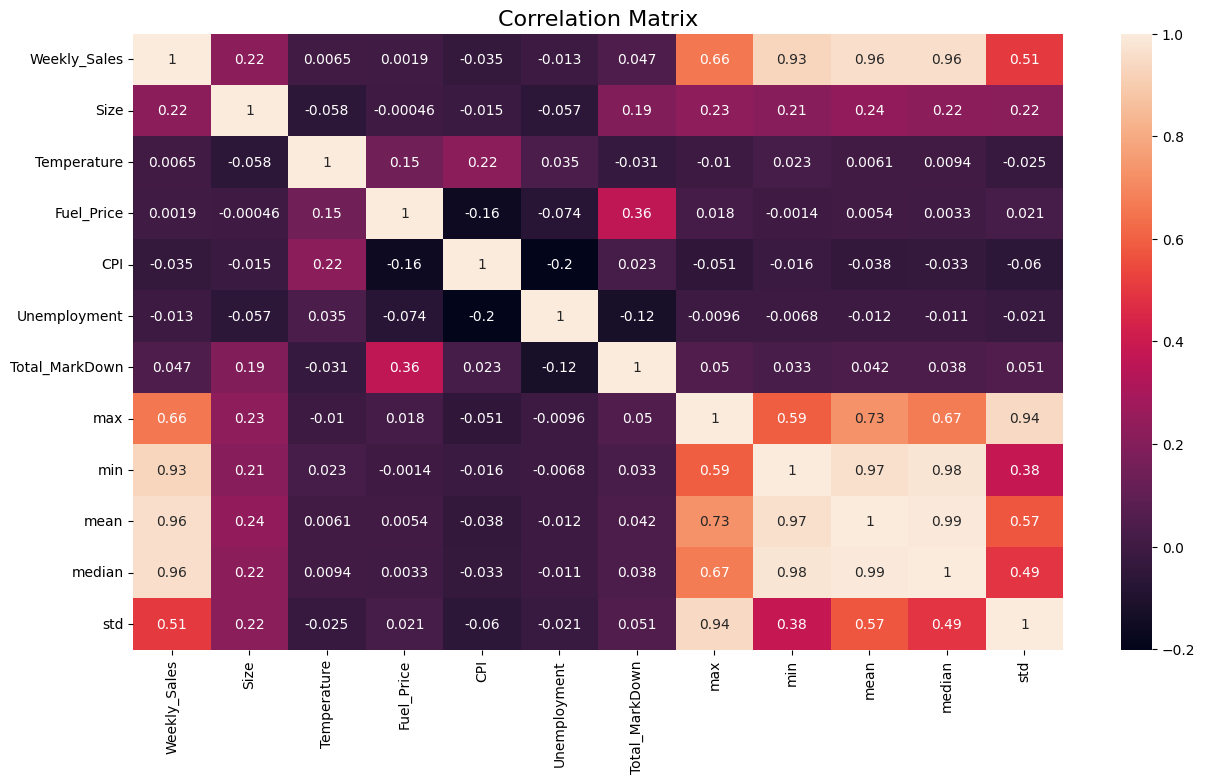

In [72]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.savefig('plots/correlation_matrix.png')
plt.show()

# **Recursive Feature Elimination**

In [73]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

In [74]:
'''
param_grid={'n_estimators':np.arange(10,25)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)
tree.fit(data_train[feature_col],data_train['Weekly_Sales'])
'''

"\nparam_grid={'n_estimators':np.arange(10,25)}\ntree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)\ntree.fit(data_train[feature_col],data_train['Weekly_Sales'])\n"

In [75]:
#tree.best_params_

In [76]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [77]:
pkl_filename = "./models/feature_elim_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(radm_clf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


In [78]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,median,5.525085e-01
1,2,mean,3.753655e-01
2,3,Week,1.968290e-02
3,4,Temperature,8.917866e-03
4,5,max,5.936623e-03
...,...,...,...
139,140,Dept_51,3.486608e-10
140,141,Dept_45,2.250165e-10
141,142,Dept_78,2.100065e-12
142,143,Dept_39,2.052895e-13


In [79]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['median', 'mean', 'Week', 'Temperature', 'max', 'CPI', 'Fuel_Price', 'min', 'Unemployment', 'std', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_18', 'Dept_3', 'IsHoliday', 'Size', 'Year', 'Dept_1', 'Dept_11', 'Dept_9', 'Dept_5', 'Dept_56']


In [80]:
X = data[x]
Y = data['Weekly_Sales']

In [81]:
data = pd.concat([X,Y],axis=1)

In [82]:
data

,median,mean,Week,Temperature,max,CPI,Fuel_Price,min,Unemployment,std,...,Dept_3,IsHoliday,Size,Year,Dept_1,Dept_11,Dept_9,Dept_5,Dept_56,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.173215,0.208157,5,0.328495,0.088635,0.840500,0.050100,0.253530,0.508787,0.138276,...,0,0,0.630267,2010,1,0,0,0,0,0.342576
2010-02-05,0.004767,0.004499,5,0.278565,0.001180,0.875680,0.050100,0.064648,0.305248,0.004083,...,0,0,0.492338,2010,0,0,0,0,0,0.009188
2010-02-05,0.008968,0.009135,5,0.278565,0.003866,0.875680,0.050100,0.066212,0.305248,0.004314,...,0,0,0.492338,2010,0,0,0,0,0,0.009537
2010-02-05,0.086290,0.085594,5,0.233627,0.018453,0.873861,0.050100,0.161046,0.291286,0.010611,...,0,0,0.650636,2010,0,0,0,0,0,0.118953
2010-02-05,0.071542,0.080242,5,0.278565,0.044887,0.875680,0.050100,0.126993,0.305248,0.054362,...,0,0,0.492338,2010,0,0,0,0,0,0.152888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.082590,0.087055,43,0.647585,0.030286,0.958935,0.518036,0.119050,0.275758,0.039642,...,0,0,0.906277,2012,0,0,0,0,0,0.127259
2012-10-26,0.001617,0.001419,43,0.602996,0.000446,0.050698,0.916333,0.064822,0.760713,0.000478,...,0,0,0.026063,2012,0,0,0,0,0,0.000730
2012-10-26,0.064375,0.072181,43,0.522178,0.063107,0.165055,0.801102,0.097548,0.496028,0.072670,...,0,0,0.916437,2012,0,0,0,0,0,0.073391


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374247 entries, 2010-02-05 to 2012-10-26
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   median          374247 non-null  float64
 1   mean            374247 non-null  float64
 2   Week            374247 non-null  UInt32 
 3   Temperature     374247 non-null  float64
 4   max             374247 non-null  float64
 5   CPI             374247 non-null  float64
 6   Fuel_Price      374247 non-null  float64
 7   min             374247 non-null  float64
 8   Unemployment    374247 non-null  float64
 9   std             374247 non-null  float64
 10  Month           374247 non-null  int64  
 11  Total_MarkDown  374247 non-null  float64
 12  Dept_16         374247 non-null  uint8  
 13  Dept_18         374247 non-null  uint8  
 14  Dept_3          374247 non-null  uint8  
 15  IsHoliday       374247 non-null  int64  
 16  Size            374247 non-null  float64

In [84]:
data.to_csv('./datasets/final_data.csv')

# **Data Splitted into Training, Test**

In [85]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [377]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.50, random_state=50)

# **Linear Regression Model**

**Split the Training to Training and Valid Set**

In [87]:
X_bao_train, X_bao_val, y_bao_train, y_bao_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
evalset = [(X_bao_train, y_bao_train), (X_bao_val, y_bao_val)]

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [89]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [90]:
# norm the test X_test
X_test_scaled = scaler.transform(X_test)

In [91]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  92.25354867330424


In [92]:
y_pred = lr.predict(X_test)

In [93]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.030138547983547922
MSE 0.0034876730144790084
RMSE 0.05905652389430831
R2 0.9225357191463045


In [94]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('./predictions/lr_real_pred.csv')
lr_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.132373
2010-07-09,0.364278,0.280514
2011-07-01,0.005003,0.025932
2012-01-06,0.015856,0.015360
2011-08-26,0.000318,0.002216
...,...,...
2010-11-05,0.083771,0.094221
2012-09-07,0.100752,0.130458
2012-08-10,0.208475,0.193363


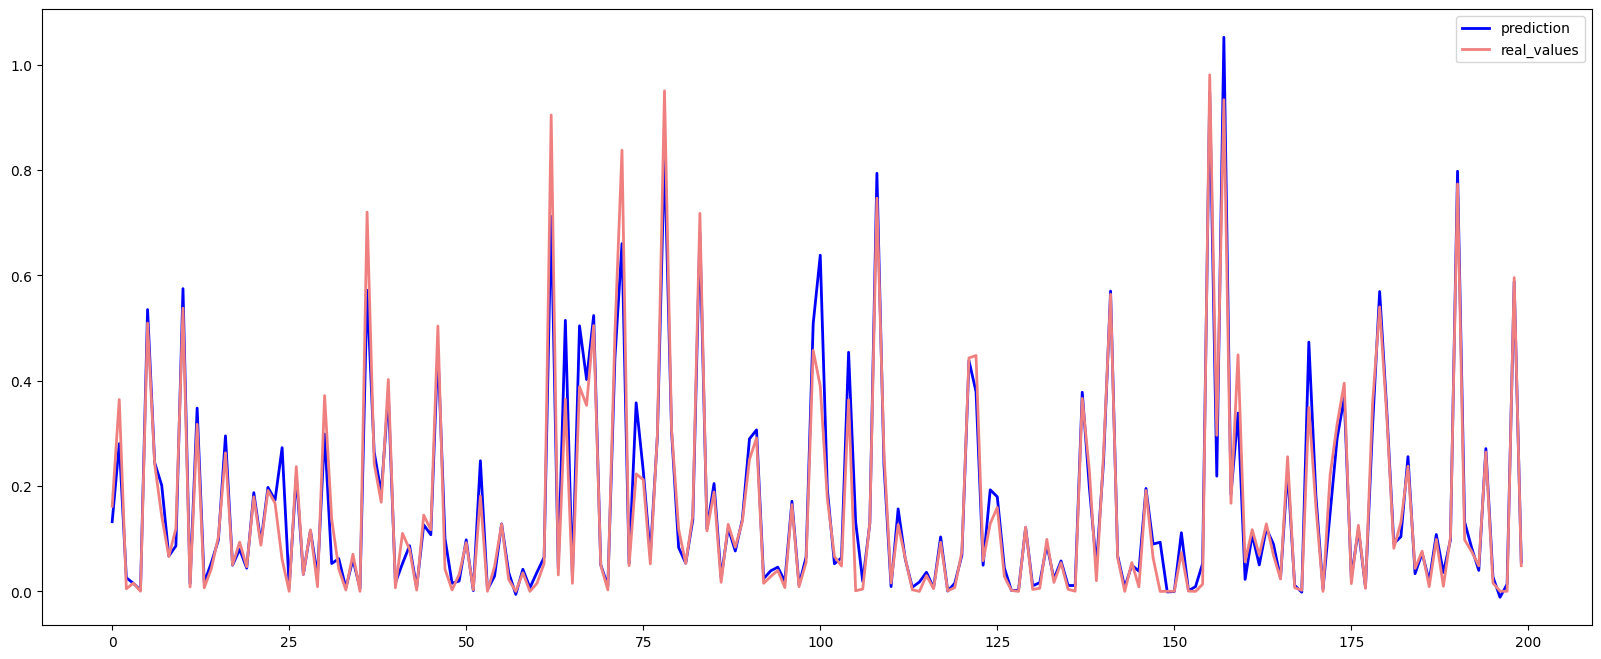

In [95]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/lr_real_pred.png')
plt.show()

**Saving trained model**

In [96]:
pkl_filename = "./models/linear_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


# **Random Forest Regressor Model**

In [97]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [98]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.43679373847915


In [99]:
y_pred = rf.predict(X_test)

In [100]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.01698544364162118
MSE 0.0011540284617863948
RMSE 0.03397099441856825
R2 0.9743697142422133


In [101]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('./predictions/rf_real_pred.csv')
rf_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.121075
2010-07-09,0.364278,0.303040
2011-07-01,0.005003,0.010148
2012-01-06,0.015856,0.019688
2011-08-26,0.000318,0.000794
...,...,...
2010-11-05,0.083771,0.092877
2012-09-07,0.100752,0.116012
2012-08-10,0.208475,0.188353


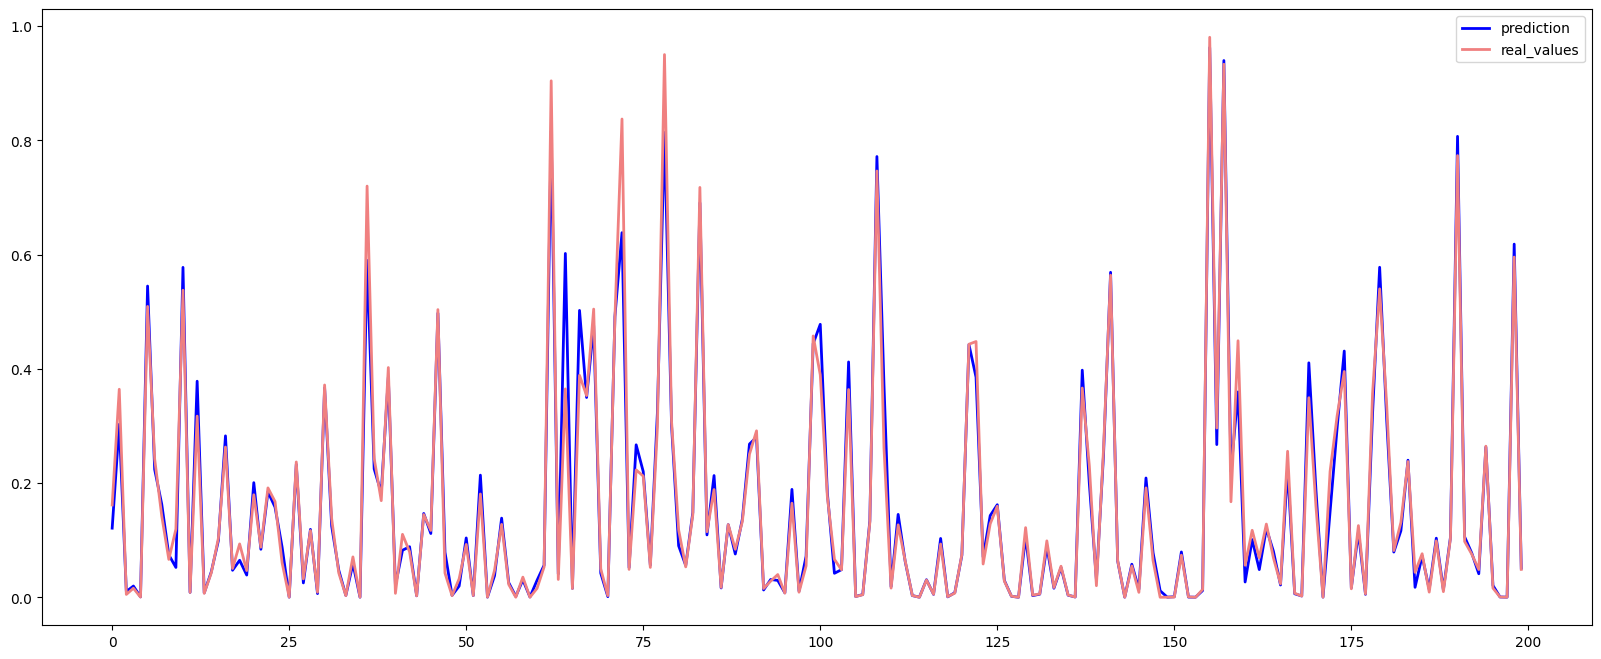

In [102]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/rf_real_pred.png')
plt.show()

**Saving trained model**

In [103]:
pkl_filename = "./models/randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


# **K Neighbors Regressor Model**

In [256]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [257]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  91.97260310713533


In [258]:
y_pred = knn.predict(X_test)

In [259]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03312215784495987
MSE 0.003624289652612284
RMSE 0.060202073490971085
R2 0.9199211027805663


In [260]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.to_csv('./predictions/knn_real_pred.csv')
knn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.112559
2010-07-09,0.364278,0.221307
2011-07-01,0.005003,0.011921
2012-01-06,0.015856,0.028551
2011-08-26,0.000318,0.001063
...,...,...
2011-01-28,0.169068,0.229475
2010-08-20,0.252860,0.262688
2010-11-26,0.265617,0.203904


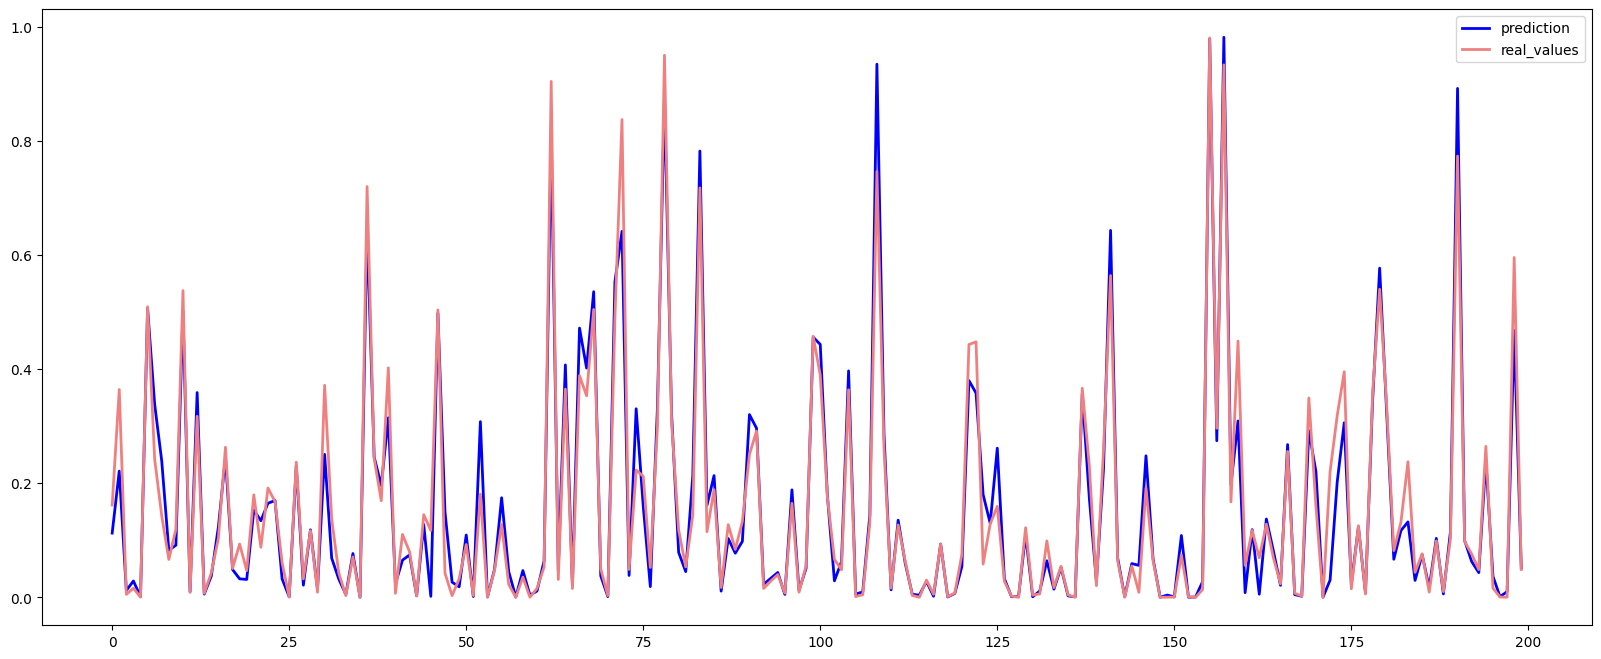

In [261]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/knn_real_pred.png')
plt.show()

**Saving trained model**

In [262]:
pkl_filename = "./models/knn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


# **XGboost Model**

In [114]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
xgbr.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

[0]	validation_0-logloss:0.40613	validation_1-logloss:0.40753
[1]	validation_0-logloss:0.37606	validation_1-logloss:0.37678
[2]	validation_0-logloss:0.35973	validation_1-logloss:0.36014
[3]	validation_0-logloss:0.35042	validation_1-logloss:0.35065
[4]	validation_0-logloss:0.34496	validation_1-logloss:0.34509
[5]	validation_0-logloss:0.34151	validation_1-logloss:0.34157


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:0.33925	validation_1-logloss:0.33930
[7]	validation_0-logloss:0.33794	validation_1-logloss:0.33795
[8]	validation_0-logloss:0.33700	validation_1-logloss:0.33701
[9]	validation_0-logloss:0.33649	validation_1-logloss:0.33647
[10]	validation_0-logloss:0.33613	validation_1-logloss:0.33611
[11]	validation_0-logloss:0.33584	validation_1-logloss:0.33586
[12]	validation_0-logloss:0.33559	validation_1-logloss:0.33558
[13]	validation_0-logloss:0.33545	validation_1-logloss:0.33540
[14]	validation_0-logloss:0.33526	validation_1-logloss:0.33531
[15]	validation_0-logloss:0.33518	validation_1-logloss:0.33516
[16]	validation_0-logloss:0.33499	validation_1-logloss:0.33498
[17]	validation_0-logloss:0.33488	validation_1-logloss:0.33491
[18]	validation_0-logloss:0.33496	validation_1-logloss:0.33496
[19]	validation_0-logloss:0.33495	validation_1-logloss:0.33496
[20]	validation_0-logloss:0.33487	validation_1-logloss:0.33487
[21]	validation_0-logloss:0.33486	validation_1-logloss:0.33

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [116]:
# retrieve performance metrics
results = xgbr.evals_result()

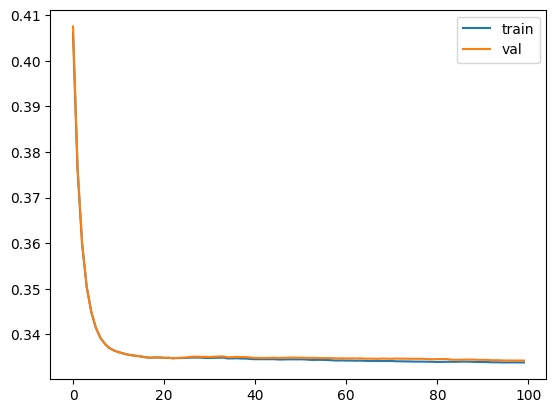

In [117]:
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='val')
# show the legend
plt.legend()
# show the plot
plt.show()

In [118]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.15636221024901


In [119]:
y_pred = xgbr.predict(X_test)

In [120]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.02019442799243959
MSE 0.0012802867227847954
RMSE 0.03578109448835789
R2 0.971563624763607


In [121]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('./predictions/xgb_real_pred.csv')
xgb_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.128109
2010-07-09,0.364278,0.303878
2011-07-01,0.005003,0.021321
2012-01-06,0.015856,0.021951
2011-08-26,0.000318,0.000323
...,...,...
2010-11-05,0.083771,0.100106
2012-09-07,0.100752,0.113095
2012-08-10,0.208475,0.185110


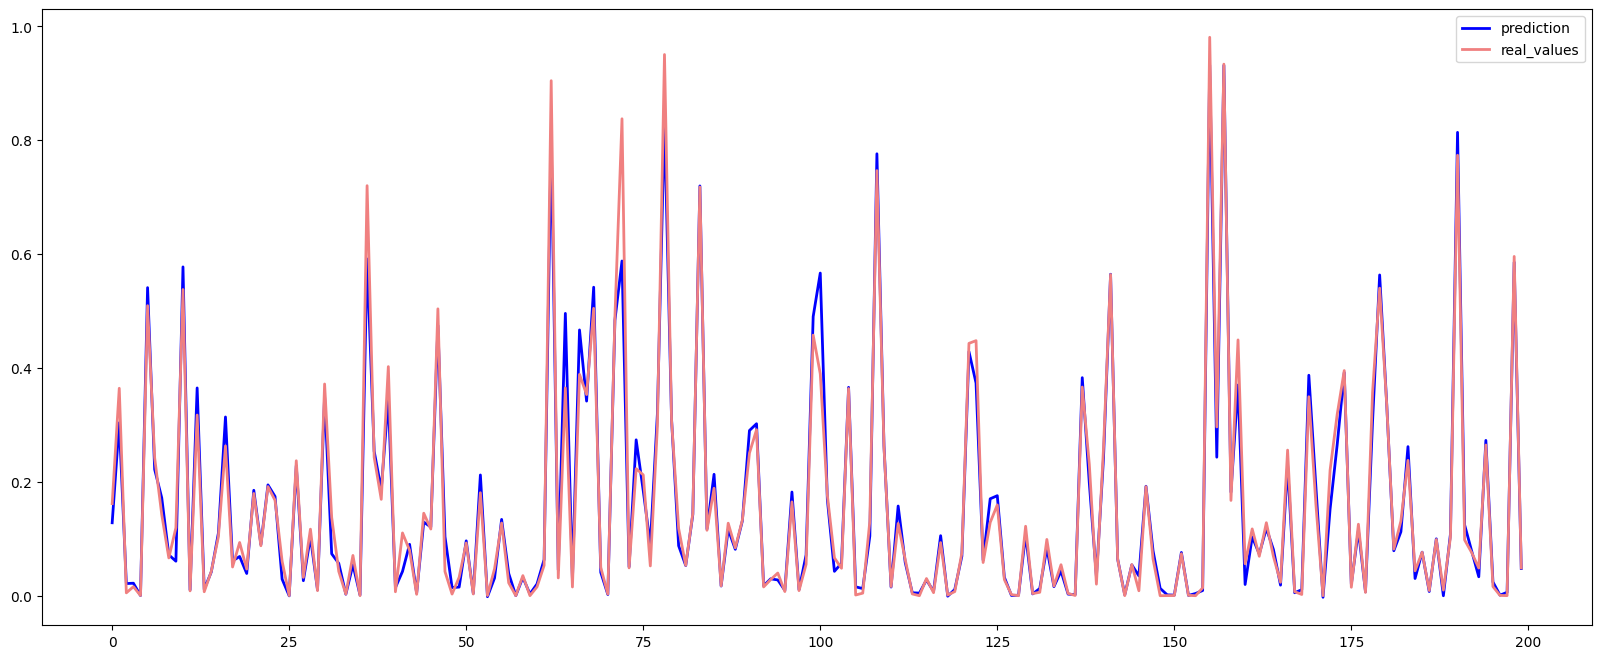

In [122]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('plots/xgb_real_pred.png')
plt.show()

**Saving trained model**

In [123]:
pkl_filename = "./models/xgboost_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(xgbr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


# **MLPs**

In [378]:
import keras
def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1] ,activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer='adam')
  return model

In [379]:
estimator_model = KerasRegressor(build_fn=create_model, verbose=1)

In [380]:
history = estimator_model.fit(X_train.astype('float32'), y_train.astype('float32'), validation_split=0.2, epochs=100, batch_size=1000)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


150/150 [==============================] - 1s 4ms/step - loss: 2970.1436 - val_loss: 0.1171
Epoch 2/100
150/150 [==============================] - 1s 4ms/step - loss: 0.1079 - val_loss: 0.1037
Epoch 3/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0992 - val_loss: 0.0956
Epoch 4/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0916 - val_loss: 0.0886
Epoch 5/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0852 - val_loss: 0.0829
Epoch 6/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0801 - val_loss: 0.0781
Epoch 7/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0758 - val_loss: 0.0745
Epoch 8/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0720 - val_loss: 0.0704
Epoch 9/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0683 - val_loss: 0.0668
Epoch 10/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0648 - val_loss: 0.063

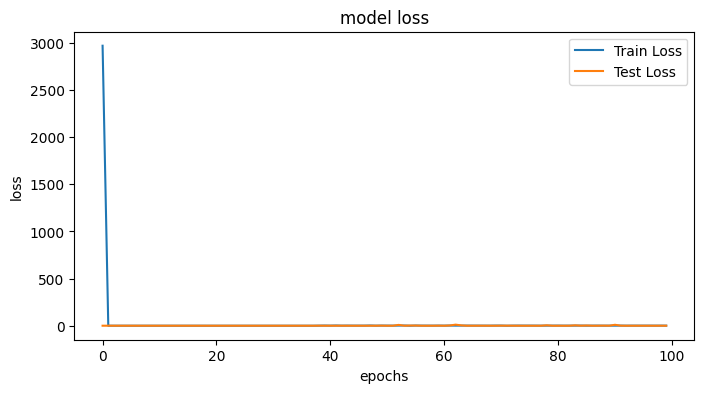

In [381]:
plt.figure(figsize=(8,4))
plt.plot(history.history_['loss'], label='Train Loss')
plt.plot(history.history_['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.savefig('plots/dnn_loss.png')
plt.show()

In [382]:
y_pred = estimator_model.predict(X_test.astype('float32'))

5848/5848 [==============================] - 8s 1ms/step


In [383]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network accuracy - ",dnn_acc)

Deep Neural Network accuracy -  -217.92184740002241


In [385]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.35713503781705225
MSE 0.13048463191878745
RMSE 0.3612265659095237
R2 0.9167545147419802


In [135]:
dnn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dnn_df.to_csv('./predictions/dnn_real_pred.csv')
dnn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.110195
2010-07-09,0.364278,0.268581
2011-07-01,0.005003,0.011274
2012-01-06,0.015856,0.010629
2011-08-26,0.000318,0.002377
...,...,...
2010-11-05,0.083771,0.075603
2012-09-07,0.100752,0.118887
2012-08-10,0.208475,0.173631


4/4 [==============================] - 0s 2ms/step


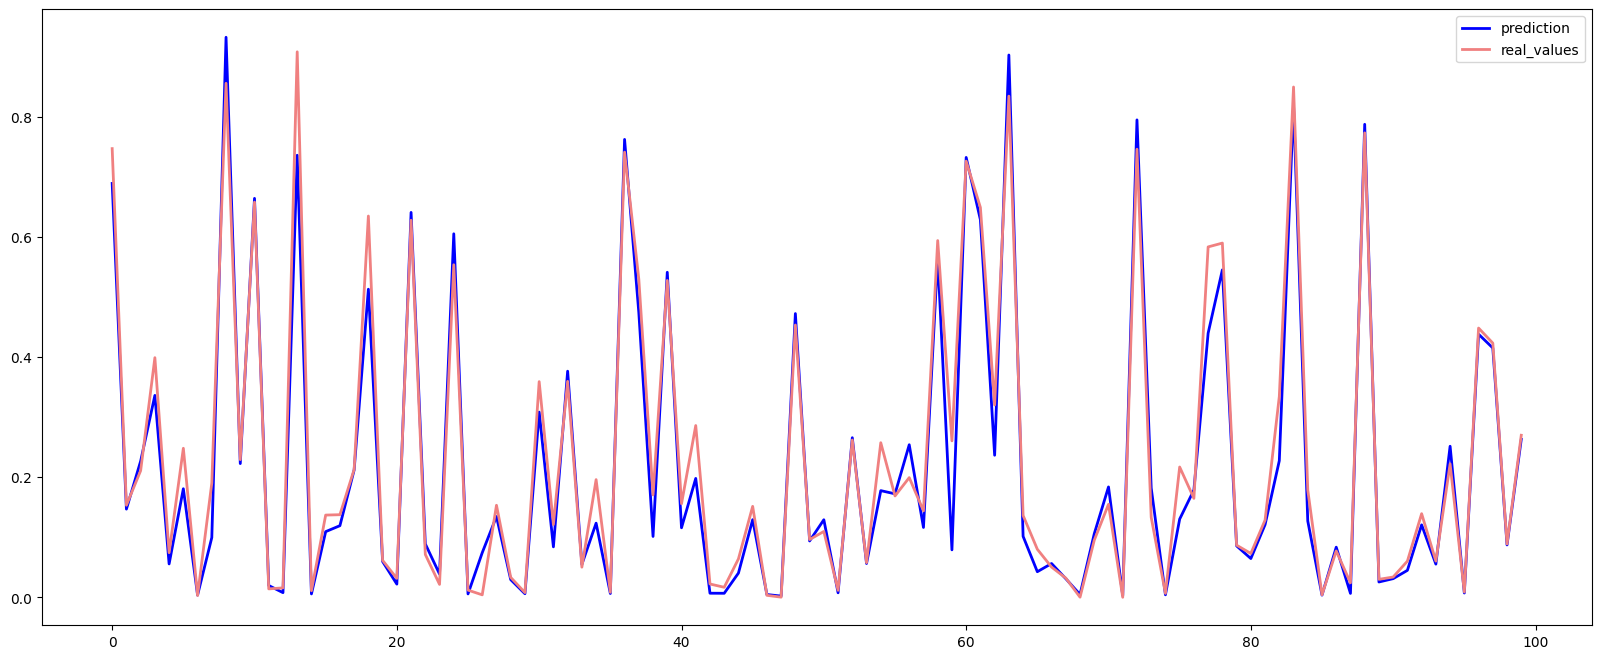

In [136]:
plt.figure(figsize=(20,8))
plt.plot(estimator_model.predict(X_test.astype('float32')[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.savefig('plots/dnn_real_pred.png')
plt.legend(loc="best")

In [137]:
filepath = './models/dnn_regressor.json'
weightspath = './models/dnn_regressor.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  model_json = estimator_model.model.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(model_json)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


In [387]:
X_train_array = X_train.to_numpy()
X_train_array = np.reshape(X_train_array, (X_train_array.shape[0], X_train_array.shape[1], 1))

**DEEPLEARNING - MLP 5 layers**

In [386]:
model_5layers = Sequential([
    Dense(64, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression task
])

model_5layers.compile(optimizer='adam', loss='mean_squared_error')

model_5layers.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 64)                1536      
                                                                 
 dense_65 (Dense)            (None, 128)               8320      
                                                                 
 dense_66 (Dense)            (None, 256)               33024     
                                                                 
 dense_67 (Dense)            (None, 64)                16448     
                                                                 
 dense_68 (Dense)            (None, 32)                2080      
                                                                 
 dense_69 (Dense)            (None, 1)                 33        
                                                                 
Total params: 61441 (240.00 KB)
Trainable params: 614

In [388]:
history = model_5layers.fit(X_train.astype('float32'), y_train.astype('float32'), validation_split=0.2, epochs=100, batch_size=1000)

Epoch 1/100
150/150 [==============================] - 2s 6ms/step - loss: 24.5207 - val_loss: 0.0457
Epoch 2/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0448 - val_loss: 0.0446
Epoch 3/100
150/150 [==============================] - 1s 6ms/step - loss: 0.0438 - val_loss: 0.0432
Epoch 4/100
150/150 [==============================] - 1s 6ms/step - loss: 0.0430 - val_loss: 0.0422
Epoch 5/100
150/150 [==============================] - 1s 6ms/step - loss: 0.0415 - val_loss: 0.0407
Epoch 6/100
150/150 [==============================] - 1s 6ms/step - loss: 0.0406 - val_loss: 0.0390
Epoch 7/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0387 - val_loss: 0.0379
Epoch 8/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0378 - val_loss: 0.0378
Epoch 9/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0362 - val_loss: 0.0334
Epoch 10/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0344 - val_l

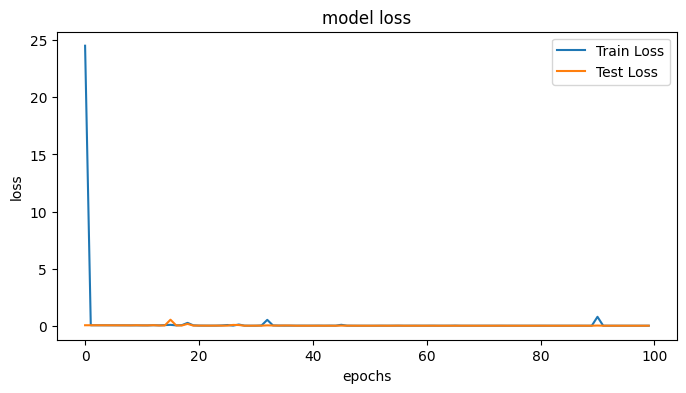

In [389]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.savefig('plots/dnn_loss.png')
plt.show()

In [390]:
y_pred = model_5layers.predict(X_test.astype('float32'))

5848/5848 [==============================] - 9s 2ms/step


In [391]:
dnn5_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network with 5 layers accuracy - ",dnn5_acc)

Deep Neural Network with 5 layers accuracy -  87.34568675654633


In [338]:
y_pred

array([[ 0.0836152 ],
       [ 0.2540894 ],
       [ 0.00134166],
       ...,
       [ 0.32139203],
       [-0.00422445],
       [ 0.20307232]], dtype=float32)

In [392]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.04901431581495608
MSE 0.0051730998641035765
RMSE 0.07192426477972212
R2 0.9221241723772335


In [155]:
np.array(y_test).reshape(-1,1)

array([[0.16166146],
       [0.36427847],
       [0.00500301],
       ...,
       [0.20847549],
       [0.03494177],
       [0.19293206]])

In [157]:
dnn5_df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': y_pred.reshape(-1)})
dnn5_df.to_csv('./predictions/dnn5_real_pred.csv')
dnn5_df

,Actual,Predicted
0,0.161661,0.131746
1,0.364278,0.304477
2,0.005003,0.033609
3,0.015856,0.011922
4,0.000318,0.013527
...,...,...
187119,0.083771,0.100574
187120,0.100752,0.148022
187121,0.208475,0.205678
187122,0.034942,0.050333


4/4 [==============================] - 0s 2ms/step


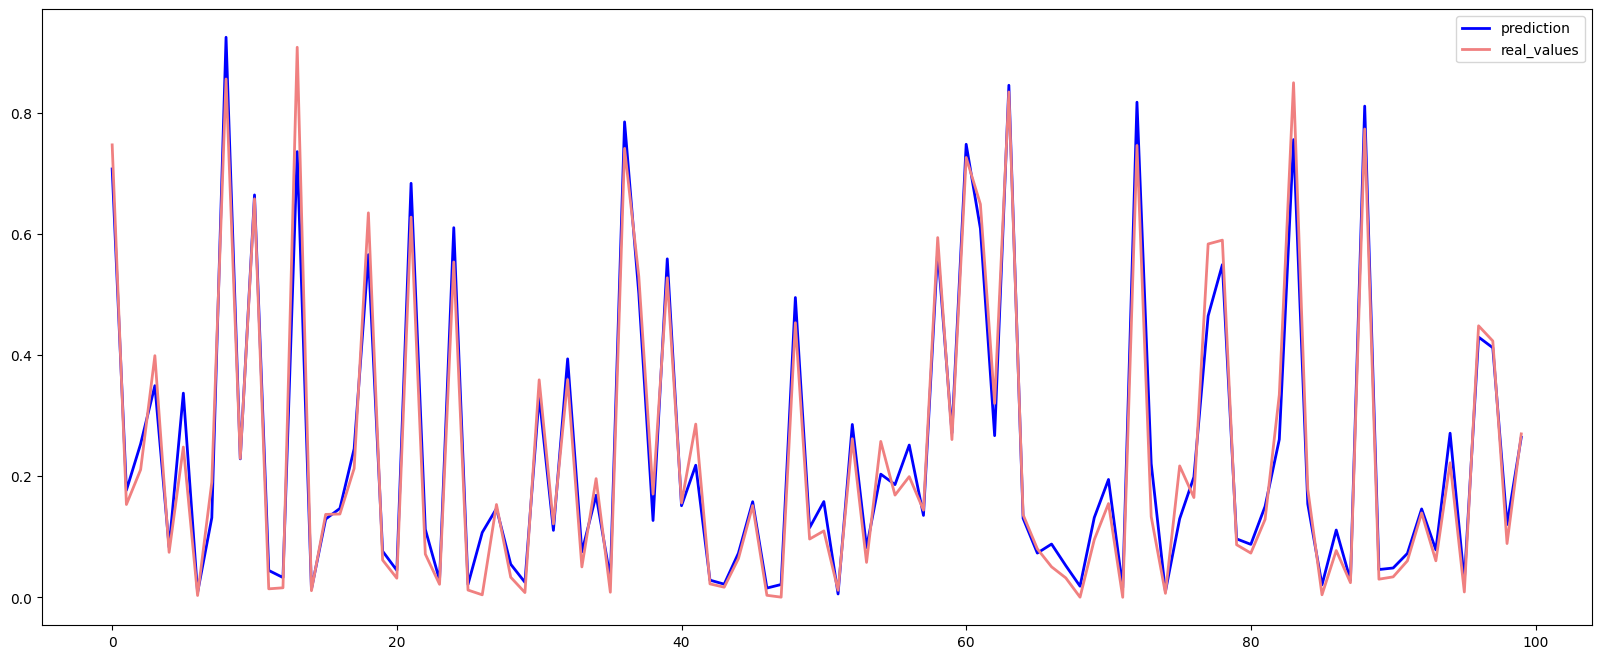

In [158]:
plt.figure(figsize=(20,8))
plt.plot(model_5layers.predict(X_test.astype('float32')[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.savefig('plots/dnn_real_pred.png')
plt.legend(loc="best")

In [161]:
filepath = './models/dnn5_regressor.json'
weightspath = './models/dnn5_regressor.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  model_json = model_5layers.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(model_json)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


# **LSTM**


In [393]:
from keras.layers import LSTM, Dense

model_bao = Sequential()
model_bao.add(LSTM(units=50, input_shape=(X_train_array.shape[1], X_train_array.shape[2])))
model_bao.add(Dense(units=1))

model_bao.compile(optimizer='adam', loss='mse')

In [394]:
# model_bao.fit(X_train_array.astype('float32'), y_train, epochs=10, batch_size=32)
history = model_bao.fit(X_train_array.astype('float32'), y_train.astype('float32'), validation_split=0.2, epochs=100, batch_size=1000)

Epoch 1/100
150/150 [==============================] - 3s 12ms/step - loss: 0.0458 - val_loss: 0.0382
Epoch 2/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0157 - val_loss: 0.0066
Epoch 3/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 4/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 5/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 6/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 7/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 8/100
150/150 [==============================] - 1s 9ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 9/100
150/150 [==============================] - 1s 9ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 10/100
150/150 [==============================] - 1s 8ms/step - loss: 0.0038 - val_l

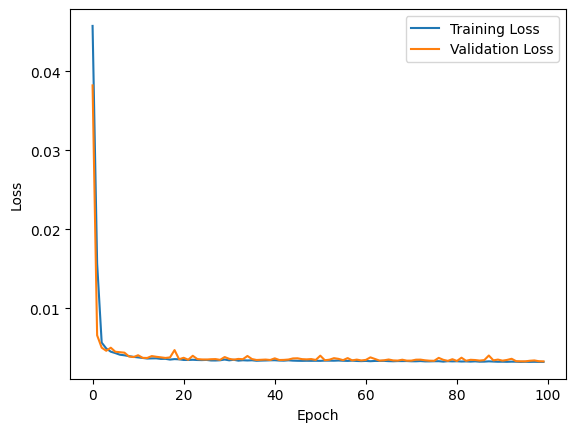

In [395]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [396]:
y_pred_bao = model_bao.predict(X_test.astype('float32'))

5848/5848 [==============================] - 16s 3ms/step


In [397]:
lstm_acc = metrics.r2_score(y_pred_bao, y_test)*100
print("LSTM accuracy - ",lstm_acc)

LSTM accuracy -  92.3258435403806


In [398]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred_bao))
print("MSE" , metrics.mean_squared_error(y_test, y_pred_bao))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_bao)))
print("R2" , metrics.explained_variance_score(y_test, y_pred_bao))

MAE 0.029796083409880766
MSE 0.0032119296947585815
RMSE 0.05667388900330188
R2 0.9286645585972896


4/4 [==============================] - 0s 3ms/step


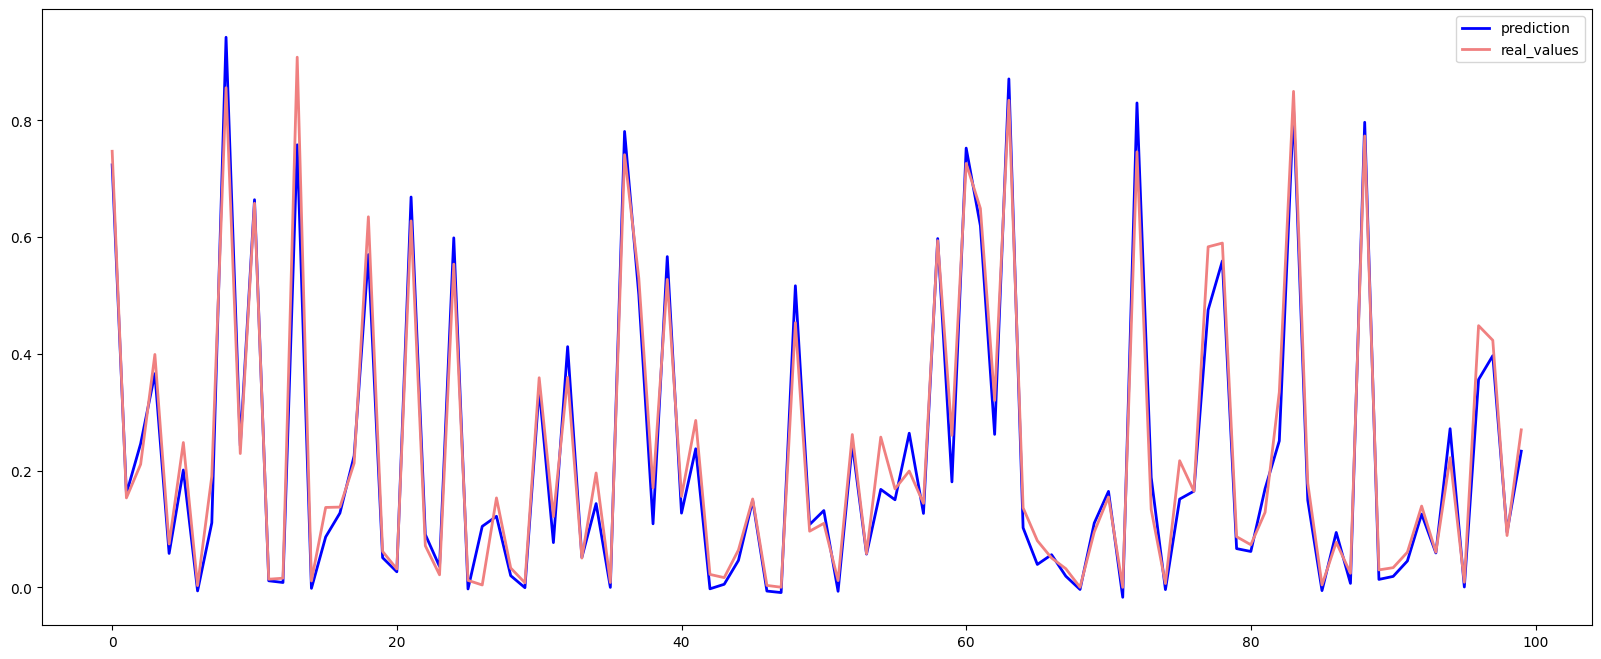

In [168]:
plt.figure(figsize=(20,8))
plt.plot(model_bao.predict(X_test.astype('float32')[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.savefig('plots/lstm_real_pred.png')
plt.legend(loc="best")

In [169]:
# File paths
json_filepath = './models/lstm.json'
weights_filepath = './models/lstm.h5'
if not path.isfile(json_filepath):
    # Serialize model to JSON
    model_json = model_bao.to_json()
    with open(json_filepath, "w") as json_file:
        json_file.write(model_json)
    print("Saved model architecture to disk")
else:
    print("Model architecture file already exists")

if not path.isfile(weights_filepath):
    # Save the model weights
    model_bao.save_weights(weights_filepath)
    print("Saved model weights to disk")
else:
    print("Model weights file already exists")


Model architecture file already exists
Model weights file already exists


# **GRU**

In [275]:
from keras.layers import GRU

model_gru = Sequential()
model_gru.add(GRU(units=50, input_shape=(X_train_array.shape[1], X_train_array.shape[2])))
model_gru.add(Dense(units=1))

model_gru.compile(optimizer='adam', loss='mse')

In [276]:
import tensorflow as tf

# if tf.config.list_physical_devices('GPU'):
#     print("GPU available. Using GPU for training.")
#     # Limit TensorFlow to use only the first GPU and allocate memory dynamically
#     physical_devices = tf.config.list_physical_devices('GPU')
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)
# else:
#     print("No GPU available. Using CPU for training.")

In [277]:
# history = model_gru.fit(X_train_array.astype('float32'), y_train.astype('float32'), validation_split=0.2, epochs=10, batch_size=1000)
# # history = model_gru.fit(X_train_array.astype('float32'), y_train, epochs=10, batch_size=32)

In [278]:
history = model_gru.fit(X_train_array.astype('float32'), y_train.astype('float32'), validation_split=0.2, epochs=100, batch_size=1000)
# history = model_gru.fit(X_train_array.astype('float32'), y_train, epochs=10, batch_size=1000)

Epoch 1/100
240/240 [==============================] - 4s 10ms/step - loss: 0.0393 - val_loss: 0.0127
Epoch 2/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0061 - val_loss: 0.0050
Epoch 3/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 4/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 5/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 6/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 7/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 8/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 9/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0038 - val_loss: 0.0043
Epoch 10/100
240/240 [==============================] - 2s 8ms/step - loss: 0.0037 - val_l

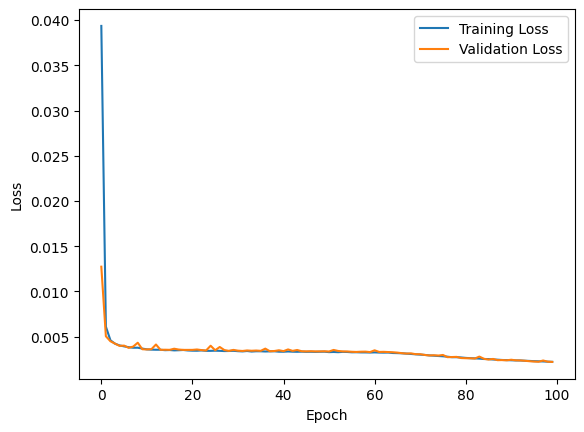

In [279]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [280]:
y_pred_gru = model_gru.predict(X_test.astype('float32'))

2340/2340 [==============================] - 6s 3ms/step


In [281]:
gru_acc = metrics.r2_score(y_pred_gru, y_test)*100
print("GRU accuracy - ", gru_acc)

GRU accuracy -  94.52693500458464


In [282]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred_gru))
print("MSE" , metrics.mean_squared_error(y_test, y_pred_gru))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_gru)))
print("R2" , metrics.explained_variance_score(y_test, y_pred_gru))

MAE 0.026821807455308138
MSE 0.0022437964645407554
RMSE 0.04736872876213542
R2 0.9503139141401028


4/4 [==============================] - 0s 3ms/step


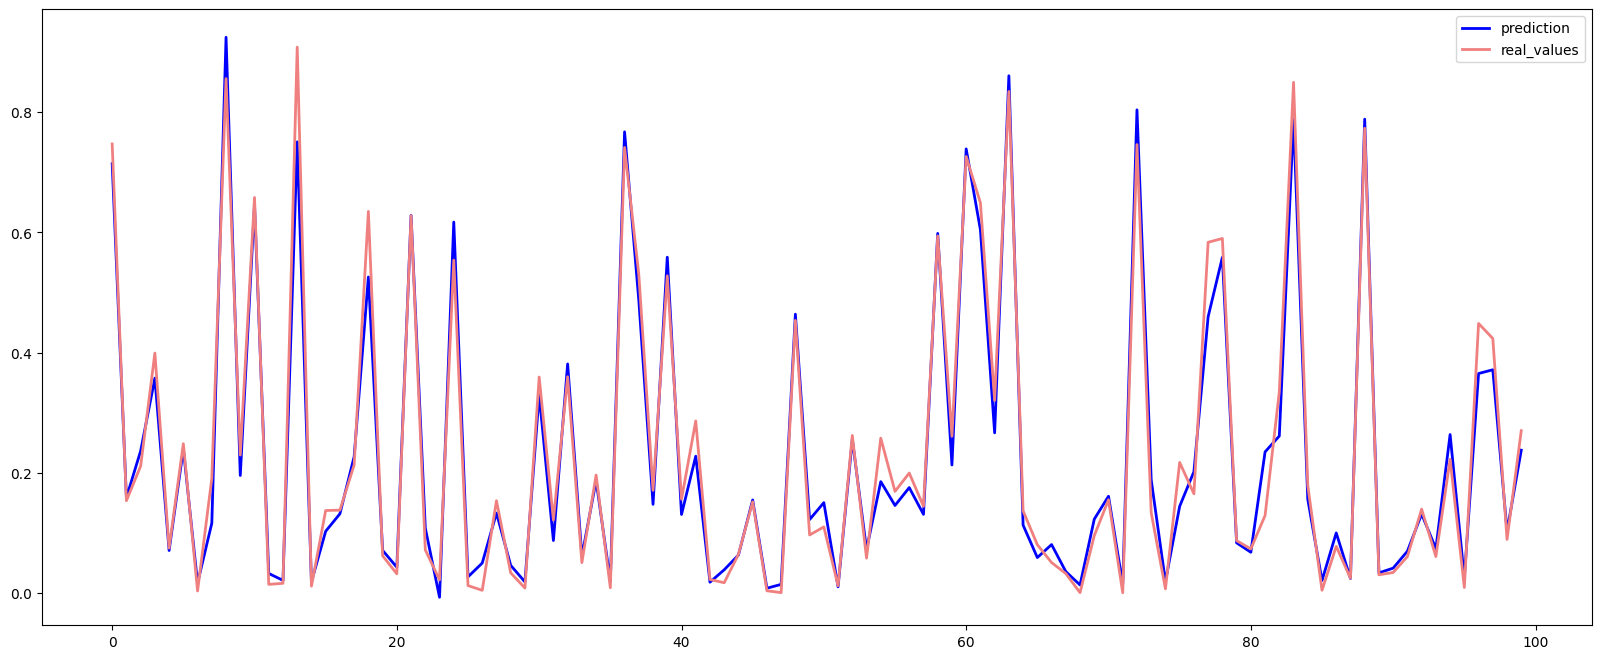

In [283]:
plt.figure(figsize=(20,8))
plt.plot(model_gru.predict(X_test.astype('float32')[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.savefig('plots/lstm_real_pred.png')
plt.legend(loc="best")

In [284]:
# Save the model architecture to JSON
gru_json_filepath = './models/gru.json'
with open(gru_json_filepath, "w") as json_file:
    json_file.write(model_gru.to_json())
print("Saved GRU model architecture to disk")

# Save the model weights
gru_weights_filepath = './models/gru.h5'
model_gru.save_weights(gru_weights_filepath)
print("Saved GRU model weights to disk")

Saved GRU model architecture to disk
Saved GRU model weights to disk


# **LightGBM**

In [189]:
import lightgbm as lgb
X_train_lgb, X_val_lgb, y_train_lgb, y_val_lgb = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Create LightGBM datasets
train_data_lgb = lgb.Dataset(X_train_lgb, label=y_train_lgb)
val_data_lgb = lgb.Dataset(X_val_lgb, label=y_val_lgb, reference=train_data_lgb)

# Train the model
num_round = 10000
num_threads = 4  # Set the number of threads for multi-threading

In [190]:
model_lgb_ = lgb.LGBMRegressor(objective='mse', seed=1, num_threads=1)
model_lgb_.fit(X_train_lgb, y_train_lgb, eval_set=[(X_train_lgb, y_train_lgb), (X_val_lgb, y_val_lgb)])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2669
[LightGBM] [Info] Number of data points in the train set: 149698, number of used features: 23
[LightGBM] [Info] Start training from score 0.179442


LGBMRegressor(num_threads=1, objective='mse', seed=1)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l2'>

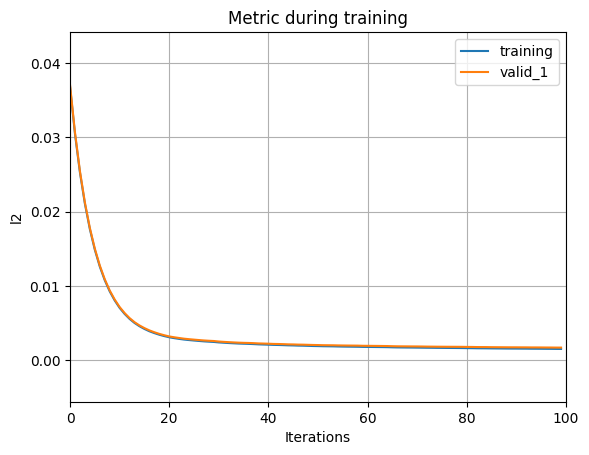

In [191]:
lgb.plot_metric(model_lgb_)


In [192]:
model_lgb = lgb.train(params, train_data_lgb, num_boost_round=num_round, valid_sets=[val_data_lgb])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2669
[LightGBM] [Info] Number of data points in the train set: 149698, number of used features: 23
[LightGBM] [Info] Start training from score 0.179442


In [193]:
# Save the model to a file
model_lgb.save_model('./models/lightgbm_model.txt')

In [196]:
# Make predictions on the validation set
y_pred_lgb = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration)

In [197]:
lgb_acc = metrics.r2_score(y_pred_lgb, y_test)*100
print("Old LGBooster accuracy - ",lgb_acc)

Old LGBooster accuracy -  98.00378418780616


In [198]:
# Make predictions on the validation set
y_pred_lgb = model_lgb_.predict(X_test, num_iteration=model_lgb.best_iteration)

In [199]:
lgb_acc = metrics.r2_score(y_pred_lgb, y_test)*100
print("LGB accuracy - ",lgb_acc)

LGB accuracy -  96.04231416748351


In [200]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred_lgb))
print("MSE" , metrics.mean_squared_error(y_test, y_pred_lgb))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgb)))
print("R2" , metrics.explained_variance_score(y_test, y_pred_lgb))

MAE 0.022608551754672693
MSE 0.0016846945408747426
RMSE 0.04104503064775007
R2 0.9625813446792005


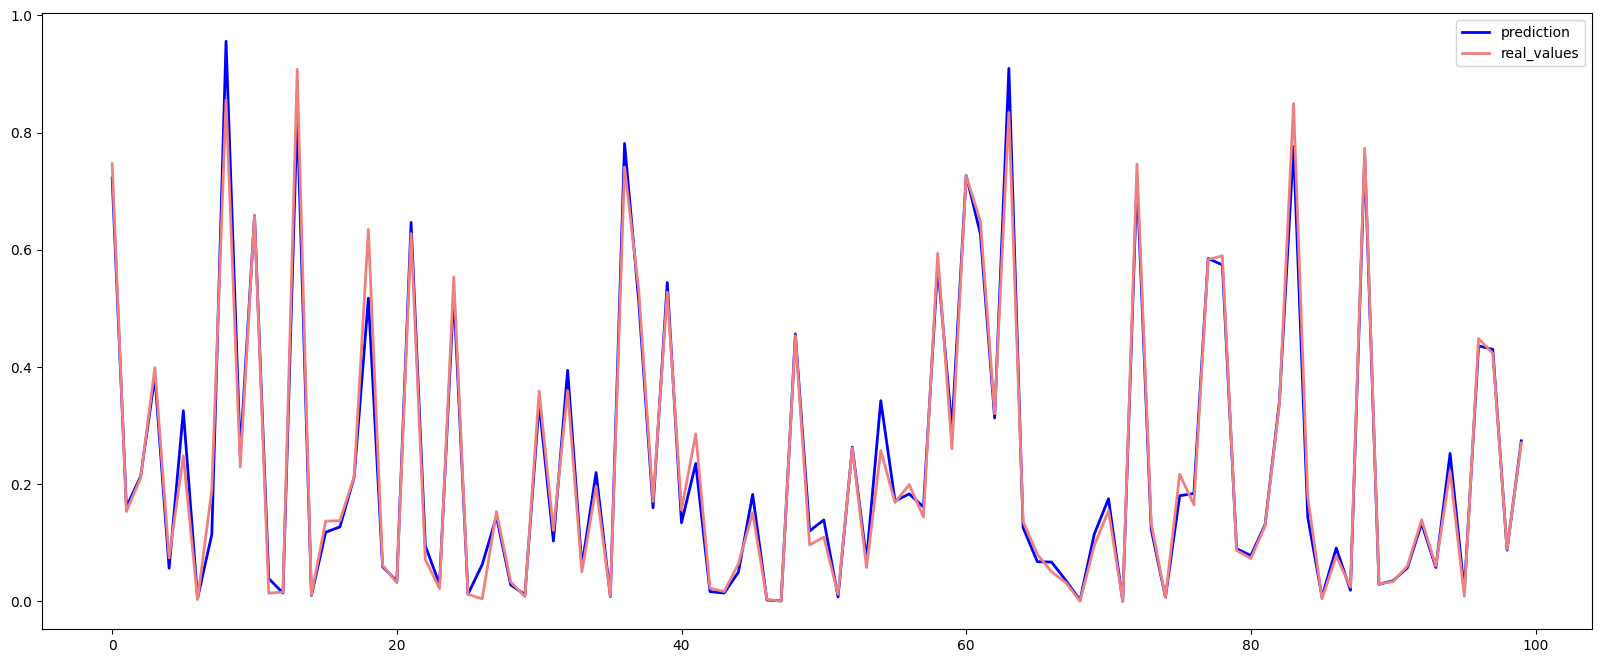

In [201]:
plt.figure(figsize=(20,8))
plt.plot(model_lgb.predict(X_test.astype('float32')[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.savefig('plots/lgb_real_pred.png')
plt.legend(loc="best")

# **CatBoost**

In [202]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 16.4 MB/s eta 0:00:00


In [203]:
from catboost import CatBoostRegressor, Pool
import catboost

params = {
    'iterations': 10000,  # Set the number of boosting iterations
    'learning_rate': 0.05,
    'depth': 6,
    'loss_function': 'RMSE',  # Use RMSE as the loss function for regression
    'early_stopping_rounds': 10,  # Set the early stopping rounds
    'verbose': 100  # Print information every 100 iterations
}

train_data_cat = Pool(data=X_train_lgb, label=y_train_lgb)
val_data_cat = Pool(data=X_val_lgb, label=y_val_lgb)

In [204]:
model_cat = CatBoostRegressor(**params)
model_cat.fit(train_data_cat, eval_set=val_data_cat)

# Save the model to a file
model_cat.save_model('./models/catboost_model.cbm')


0:	learn: 0.2021370	test: 0.2027092	best: 0.2027092 (0)	total: 57.3ms	remaining: 9m 33s
100:	learn: 0.0513988	test: 0.0524832	best: 0.0524832 (100)	total: 785ms	remaining: 1m 16s
200:	learn: 0.0454448	test: 0.0463511	best: 0.0463511 (200)	total: 1.54s	remaining: 1m 15s
300:	learn: 0.0426853	test: 0.0436557	best: 0.0436557 (300)	total: 2.24s	remaining: 1m 12s
400:	learn: 0.0408581	test: 0.0418944	best: 0.0418944 (400)	total: 2.98s	remaining: 1m 11s
500:	learn: 0.0395305	test: 0.0406724	best: 0.0406724 (500)	total: 3.68s	remaining: 1m 9s
600:	learn: 0.0384859	test: 0.0396610	best: 0.0396610 (600)	total: 4.42s	remaining: 1m 9s
700:	learn: 0.0375948	test: 0.0388383	best: 0.0388383 (700)	total: 5.32s	remaining: 1m 10s
800:	learn: 0.0368659	test: 0.0382377	best: 0.0382377 (800)	total: 6.33s	remaining: 1m 12s
900:	learn: 0.0362298	test: 0.0377055	best: 0.0377055 (900)	total: 7.34s	remaining: 1m 14s
1000:	learn: 0.0356936	test: 0.0372685	best: 0.0372685 (1000)	total: 8.43s	remaining: 1m 15s
11

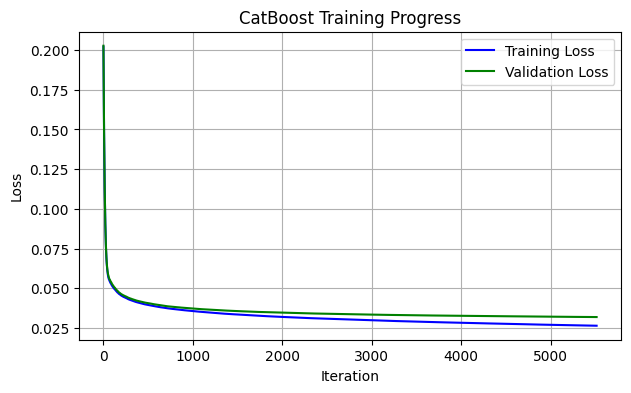

In [205]:
# Plot the training progress
evals_result = model_cat.get_evals_result()
train_loss = evals_result['learn']
test_loss = evals_result['validation']

iterations = np.arange(1, len(train_loss['RMSE']) + 1)

plt.figure(figsize=(7, 4))
plt.plot(iterations, train_loss['RMSE'], label='Training Loss', color='blue')
plt.plot(iterations, test_loss['RMSE'], label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('CatBoost Training Progress')
plt.legend()
plt.grid()
plt.show()

In [206]:
# Make predictions on the validation set
y_pred_cat = model_cat.predict(X_test)

In [207]:
cat_acc = metrics.r2_score(y_pred_cat, y_test)*100
print("LGB accuracy - ",cat_acc)
print("")
print("MAE" , metrics.mean_absolute_error(y_test, y_pred_cat))
print("MSE" , metrics.mean_squared_error(y_test, y_pred_cat))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred_cat)))
print("R2" , metrics.explained_variance_score(y_test, y_pred_cat))

LGB accuracy -  97.60574216702406

MAE 0.018296483359270005
MSE 0.0010440421923164965
RMSE 0.032311641745917156
R2 0.9768108480706762


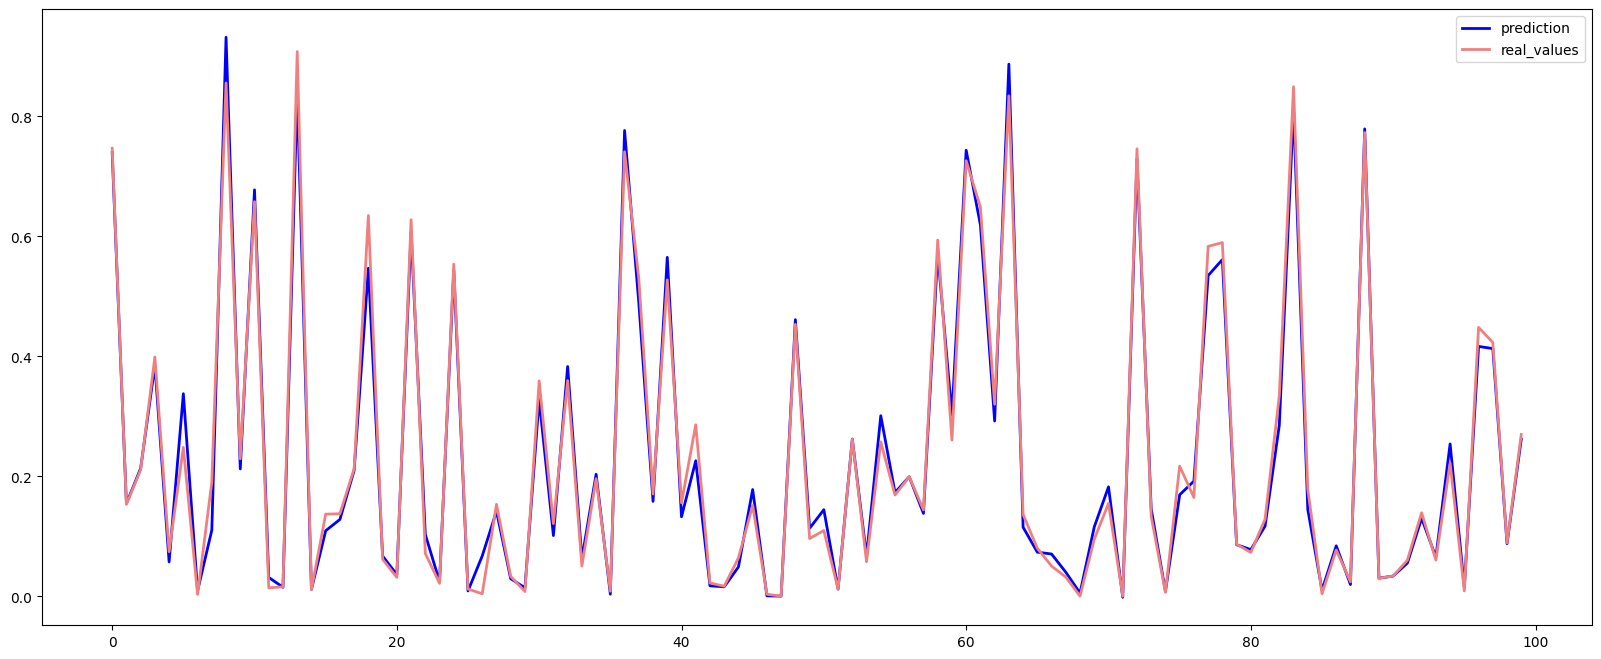

In [208]:
plt.figure(figsize=(20,8))
plt.plot(model_cat.predict(X_test.astype('float32')[200:300]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:300].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.savefig('plots/lgb_real_pred.png')
plt.legend(loc="best")

# **Comparing Models**

In [251]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc','dnn_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc,dnn_acc]}

In [252]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,92.253549
1,rf_acc,97.436794
2,knn_acc,90.030193
3,xgb_acc,97.156362
4,dnn_acc,90.787982


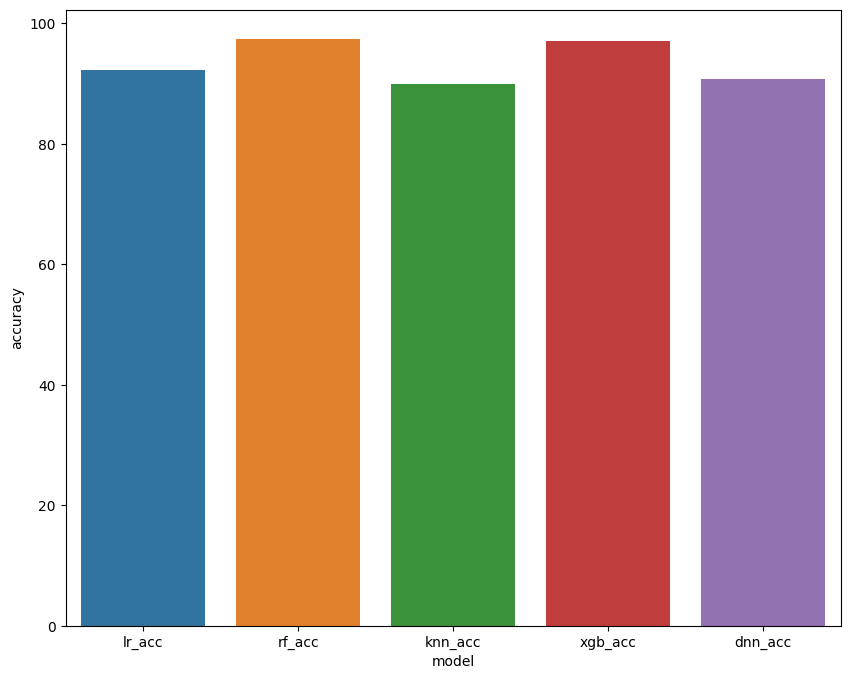

In [253]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.savefig('plots/compared_models.png')
plt.show()